# Kratek uvod v nevronske mreže

## Matematični model nevrona

![](img/2025-12-02-10-55-37.png)

## Implementacija XOR operatorje

Prenosna tabela

| Vhod A | Vhod B | Izhod Y |
|--------|--------|---------|
| 0      | 0      | 0       |
| 0      | 1      | 1       |
| 1      | 0      | 1       |
| 1      | 1      | 0       |

Topologija mreže

![Nevronska mreža](img/nn1.jpg)

Uvoz Knjižnic

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

Zapis vhodov in izhodov v obliki vektorjev (tenzorjev)

In [47]:
# Vhodni podatki (features): 4 možne kombinacije z 2 vhodoma
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

# Izhodni podatki (labels): Pravilni rezultat XOR
Y = torch.tensor([[0.], [1.], [1.], [0.]])

Model nevronske mreže

In [54]:
# Definiranje modela z nn.Sequential
# 1. Plast: Linearna (2 vhoda -> 7 nevronov)
# 2. Plast: Nelinearna aktivacija (ReLU)
# 3. Plast: Linearna (7 nevronov -> 1 izhod)
# 4. Plast: Nelinearna aktivacija (Sigmoid za binarni izhod)

model = nn.Sequential(
    nn.Linear(2, 7),  # Vhod (2) -> Skrita plast (7 nevronov)
    nn.ReLU(),
    nn.Linear(7, 1),  # Skrita plast (7) -> Izhod (1 nevron)
    nn.Sigmoid()
)

In [55]:
# Loss: Binarna Cross-Entropy Loss
criterion = nn.BCELoss() 

# Optimizer: Adam (z učno hitrostjo 0.1)
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Seznam za shranjevanje izgube
loss_history = []

In [56]:
N_EPOCHS = 100 # Število ponovitev učenja


for epoch in range(N_EPOCHS):
    # 1. Forward Pass: Pridobitev napovedi
    y_pred = model(X)
    
    # 2. Izračun Izgube
    loss = criterion(y_pred, Y)
    loss_history.append(loss.item())
    
    # 3. Zero Gradients in Backward Pass (Prilagajanje uteži)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [57]:
model.eval() 
with torch.no_grad():
    predictions = model(X)
    
# Pretvorba napovedi v binarni razred
predicted_classes = (predictions >= 0.5).float()

print("\n--- Končni Rezultati ---")
for i in range(len(X)):
    print(f"Vhod: {X[i].tolist()} -> Napoved: {predictions[i].item():.4f} -> Razred: {predicted_classes[i].item():.0f} | Pravilni Izhod: {Y[i].item():.0f}")


--- Končni Rezultati ---
Vhod: [0.0, 0.0] -> Napoved: 0.0004 -> Razred: 0 | Pravilni Izhod: 0
Vhod: [0.0, 1.0] -> Napoved: 0.9997 -> Razred: 1 | Pravilni Izhod: 1
Vhod: [1.0, 0.0] -> Napoved: 0.9997 -> Razred: 1 | Pravilni Izhod: 1
Vhod: [1.0, 1.0] -> Napoved: 0.0003 -> Razred: 0 | Pravilni Izhod: 0


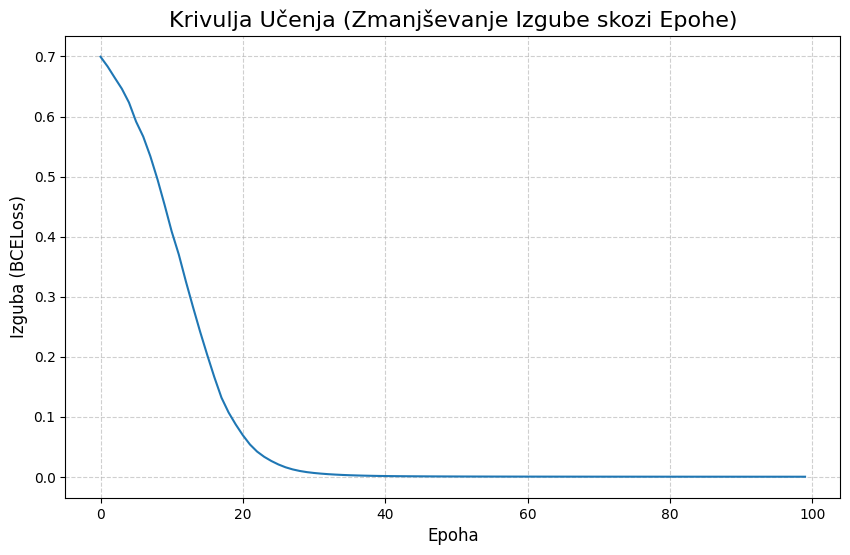

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Krivulja Učenja (Zmanjševanje Izgube skozi Epohe)', fontsize=16)
plt.xlabel('Epoha', fontsize=12)
plt.ylabel('Izguba (BCELoss)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()